This notebook is for the cleaning and examination of the data contained in MEN_SHOES.csv.

In [1]:
# The beginning-of-notebook formalities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Read and Clean Data

In [2]:
# Read in the data
df = pd.read_csv('MEN_SHOES.csv')
df.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


There are five columns: Brand_Name, How_Many_Sold, Product_details, and RATING.  They're all pretty self-explanatory despite their inconsistency, but notice that the prices are in Indian rupees (the publisher of the data was Indian).  We'll address that later.

In [3]:
# They say you're supposed to check for missing values first.
df.isna().sum()

Brand_Name           0
How_Many_Sold        0
Current_Price      798
Product_details      0
RATING               0
dtype: int64

In [4]:
# 798 missing values.  What fraction is that of the whole dataset?
df.isna().sum()['Current_Price'] / df.shape[0]

0.03333333333333333

In [5]:
# One-thirtieth?  We can do without that.  Drop it.
df = df.dropna()
df.isna().sum()

Brand_Name         0
How_Many_Sold      0
Current_Price      0
Product_details    0
RATING             0
dtype: int64

To recap: there were 798 entries with missing prices.  They seemed like a negligible segment of the dataset, so I dropped them.  Moving on...

In [6]:
# Check the datatypes of the columns
for c in df.columns:
    print(c + ": " + str(type(df[c][0])))

Brand_Name: <class 'str'>
How_Many_Sold: <class 'str'>
Current_Price: <class 'str'>
Product_details: <class 'str'>
RATING: <class 'numpy.float64'>


In [7]:
# How_Many_Sold and Current_Price are strings?  That doesn't seem right.  Fix them.
# To do that, we'll first have to remove those commas.
df['How_Many_Sold'] = df['How_Many_Sold'].str.replace(',', '').astype('int')
df.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,2242,"₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,16662,₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


In [8]:
# Now do the same with Current_Price -- and rename it so we don't lose information.
df['Current_Price_Rupees'] = df['Current_Price'].str.replace('₹', '')
df['Current_Price_Rupees'] = df['Current_Price_Rupees'].str.replace(',', '').astype('int')
df = df.drop('Current_Price', axis=1)
df.head()

,Brand_Name,How_Many_Sold,Product_details,RATING,Current_Price_Rupees
0,ASIAN,2242,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8,1098
1,ASIAN,240,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0,674
2,ASIAN,16662,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8,588
3,ASIAN,135,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0,599
4,Reebok,240,Men's Velocity Runner Lp Running Shoe,4.0,982


To recap: How_Many_Sold and Current_Price were both strings, and the values had commas in them (and in the latter column's price, monetary symbols).  I deleted those non-numerical characters and converted the columns to integers.  I could also have converted the currency from rupees to US dollars, but that would probably just complicate things at this stage.

In [9]:
# Last but not least, let's make the column labels consistent.
df = df.rename({'RATING': 'Rating', 'Product_details': 'Product_Details'}, axis='columns')
df.head()

,Brand_Name,How_Many_Sold,Product_Details,Rating,Current_Price_Rupees
0,ASIAN,2242,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8,1098
1,ASIAN,240,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0,674
2,ASIAN,16662,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8,588
3,ASIAN,135,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0,599
4,Reebok,240,Men's Velocity Runner Lp Running Shoe,4.0,982


In [10]:
# Because we copied and deleted a column, we moved it to the right.  Let's put it back.
cols = df.columns.tolist()
cols = cols[:2] + cols[-1:] + cols[2:4]
df = df[cols]
df.head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating
0,ASIAN,2242,1098,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,16662,588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,982,Men's Velocity Runner Lp Running Shoe,4.0


A largely cosmetic touch, but one that'll be appreciated: the columns have been renamed to be consistent, and the new column has been moved to the same position as the column it's replacing.  Not a bad job!

## Step 2: Preliminary Analysis

In [11]:
# Take a peek at the highest-rated shoes
df.sort_values('Rating', ascending=False).head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating
3350,Adidas,206,2159,Men's Skadi Shoes,4.4
11630,Adidas,206,2159,Men's Skadi Shoes,4.4
2570,Adidas,206,2159,Men's Skadi Shoes,4.4
7010,Adidas,206,2159,Men's Skadi Shoes,4.4
9830,Adidas,206,2159,Men's Skadi Shoes,4.4


In [12]:
# Hold up, those are all the same.  We've got duplicate entries!
df.shape[0] - df.duplicated().sum()

57

In [13]:
# The dataset is over 99% duplicates.  This bodes poorly.  Let's make a new dataset with only uniques...
df_unique = df.drop_duplicates()
df_unique.shape

(57, 5)

In [14]:
df_unique.sort_values('Rating', ascending=False).head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating
36,Sparx,3532,1231,Men's Running Shoes,4.4
50,Adidas,206,2159,Men's Skadi Shoes,4.4
37,Sparx,1072,849,Mens Sm-648 Sports Shoes,4.2
57,URJO,557,839,Mens Running Shoes,4.2
16,Sparx,173,1199,Men's Sm-680 Running Shoe,4.2


In [15]:
df_unique.sort_values('Rating', ascending=False).tail()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating
34,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
59,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
41,Robbie jones,317,499,Casual Sneakers Canvas Outwear Shoes for Men i...,2.8
39,Generic,112,298,"Sports Fahion Shoes for Men, Gym, Running, Spo...",2.8
7,Generic,84,298,Men's Mesh Lace-Ups Running/Walking/Gym/Sports...,2.4


I have a theory that certain brands are generally associated with a higher or lower average rating.  Let's test it...

In [16]:
df_unique.groupby('Brand_Name')['Rating'].mean().sort_values(ascending=False)

Brand_Name
Adidas          4.200000
URJO            4.200000
Sparx           4.133333
Campus          4.066667
Bourge          4.000000
Nivia           4.000000
BATA            3.933333
Reebok          3.920000
ASIAN           3.818182
Centrino        3.800000
D Shoes         3.600000
FEETEES         3.600000
Kraasa          3.600000
Wakefield       3.400000
Corstyle        3.400000
road runner     3.200000
Axter           3.000000
FURO            3.000000
Generic         2.933333
Robbie jones    2.800000
Name: Rating, dtype: float64

In [17]:
# Looks promising.  But let's take a closer look at what's going on here.
df_unique['Brand_Name'].value_counts().sort_values(ascending=False)

Campus          12
ASIAN           11
Sparx            6
Reebok           5
Generic          3
Adidas           3
BATA             3
Kraasa           2
Robbie jones     1
road runner      1
Corstyle         1
D Shoes          1
Centrino         1
URJO             1
Axter            1
Nivia            1
Wakefield        1
FEETEES          1
Bourge           1
FURO             1
Name: Brand_Name, dtype: int64

Interesting.  Some brands definitely score higher in general than others, but the fact that half the brands only appear once means that their averages aren't particularly useful.  Let's now look at the sales numbers.

In [18]:
df_unique.sort_values('How_Many_Sold', ascending=False).head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating
6,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
28,Sparx,38839,637,Men's Sd0323g Sneakers,4.2
46,Bourge,18747,699,Men's Loire-z1 Running Shoes,4.0
2,ASIAN,16662,588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
20,ASIAN,7712,524,"Men's Century-12 Sports Running Shoes Walking,...",3.8


In [19]:
df_unique.sort_values('How_Many_Sold', ascending=False).tail()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating
15,Sparx,60,1279,Men SM-661 Sports Shoes,3.8
56,Wakefield,49,399,Stylish Running Sports Shoes for MEN-2010,3.4
11,Campus,12,780,Men's Harrow PRO Running Shoes,4.0
13,Corstyle,7,579,Light Weight Sports Outdoors Casual Canvas Sne...,3.4
59,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0


In [20]:
df_unique.groupby('Brand_Name')['How_Many_Sold'].mean().sort_values(ascending=False)

Brand_Name
Bourge          18747.000000
ASIAN            9374.090909
Sparx            7578.500000
Kraasa           3501.000000
BATA             1981.666667
Adidas           1771.333333
D Shoes          1490.000000
Campus           1242.750000
Nivia             954.000000
Centrino          682.000000
Reebok            622.800000
URJO              557.000000
road runner       421.000000
Axter             350.000000
Robbie jones      317.000000
Generic           168.333333
FEETEES            63.000000
Wakefield          49.000000
Corstyle            7.000000
FURO                2.000000
Name: How_Many_Sold, dtype: float64

In [21]:
# Hold on-- Bourge is at the top, but it only had one listing.  Let's look at a slightly different statistic.
df_unique.groupby('Brand_Name')['How_Many_Sold'].sum().sort_values(ascending=False)

Brand_Name
ASIAN           103115
Sparx            45471
Bourge           18747
Campus           14913
Kraasa            7002
BATA              5945
Adidas            5314
Reebok            3114
D Shoes           1490
Nivia              954
Centrino           682
URJO               557
Generic            505
road runner        421
Axter              350
Robbie jones       317
FEETEES             63
Wakefield           49
Corstyle             7
FURO                 2
Name: How_Many_Sold, dtype: int64

Once again, some brands sell way more than others.  Let's put them to a graph.

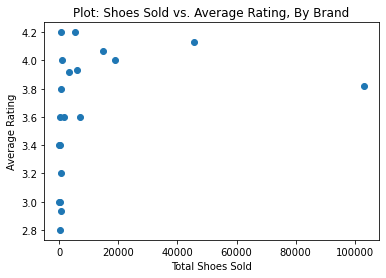

In [22]:
# Make a graph of rating vs. amount sold, grouped by value.
plt.scatter(df_unique.groupby('Brand_Name')['How_Many_Sold'].sum(), df_unique.groupby('Brand_Name')['Rating'].mean());
plt.xlabel('Total Shoes Sold');
plt.ylabel('Average Rating');
plt.title('Plot: Shoes Sold vs. Average Rating, By Brand');

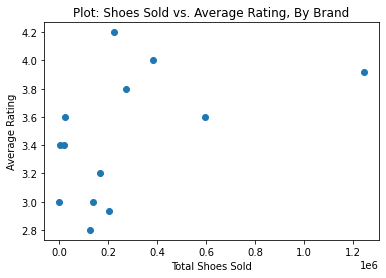

In [23]:
# The previous graph wasn't very useful.  Let's drop the outliers and try again.
hms_list = list(df_unique.groupby('Brand_Name')['How_Many_Sold'].sum().sort_values(ascending=False).index)
df_dropout = df[~df['Brand_Name'].isin(hms_list[:7])]
plt.scatter(df_dropout.groupby('Brand_Name')['How_Many_Sold'].sum(), df_dropout.groupby('Brand_Name')['Rating'].mean());
plt.xlabel('Total Shoes Sold');
plt.ylabel('Average Rating');
plt.title('Plot: Shoes Sold vs. Average Rating, By Brand');

There's a vague positive correlation, but not a strong one.  But there's one other curious detail I've noticed.  Let's investigate it in more detail.

In [24]:
df_unique['Details_Length'] = df_unique['Product_Details'].str.len()
df_unique.head()

/var/folders/dw/mtjl96g51x17gshgk6hbljjc0000gn/T/ipykernel_3265/3712102492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Details_Length'] = df_unique['Product_Details'].str.len()


,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Details_Length
0,ASIAN,2242,1098,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8,120
1,ASIAN,240,674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0,113
2,ASIAN,16662,588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8,89
3,ASIAN,135,599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0,109
4,Reebok,240,982,Men's Velocity Runner Lp Running Shoe,4.0,39


In [25]:
# My theory is that products with shorter descriptions get higher ratings.  Let's test it.
df_unique.sort_values('Details_Length').head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Details_Length
50,Adidas,206,2159,Men's Skadi Shoes,4.4,19
57,URJO,557,839,Mens Running Shoes,4.2,20
45,BATA,1685,899,Men's Formal Shoes,4.0,20
36,Sparx,3532,1231,Men's Running Shoes,4.4,21
12,road runner,421,499,Men's Sneaker Shoes,3.2,21


In [26]:
df_unique.sort_values('Details_Length').tail()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Details_Length
52,ASIAN,860,598,Men's Waterproof-05 White Sports Latest Stylis...,3.4,117
53,ASIAN,102,1173,"Men's INNOVA-04 Sports Running,Walking & Gym S...",3.8,119
0,ASIAN,2242,1098,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8,120
29,ASIAN,392,774,"Delta-20 Sports Running,Walking & Gym Shoes wi...",4.0,121
49,ASIAN,83,698,Men's Hattrick-27 Sports Shoes for Men | Runni...,3.8,132


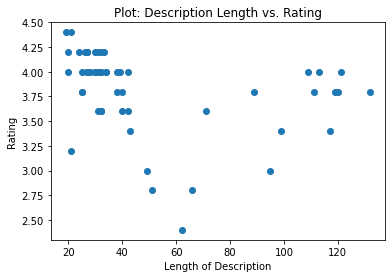

In [27]:
# Doesn't look that way.  But let's graph it just to be sure...
plt.scatter(df_unique['Details_Length'], df_unique['Rating']);
plt.xlabel('Length of Description');
plt.ylabel('Rating');
plt.title('Plot: Description Length vs. Rating');

In retrospect, it's relatively implausible for description length to correlate with anything else.  There's still one column we haven't looked at: the price.

In [28]:
df_unique.sort_values('Current_Price_Rupees', ascending=False).head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Details_Length
50,Adidas,206,2159,Men's Skadi Shoes,4.4,19
54,Adidas,116,2008,Men's Turbo Glide M Leather Running Shoe,4.0,42
31,Adidas,4992,1485,Men's Yking 2.0 Running Shoes,4.2,31
22,Campus,706,1399,Men's Mike (N) Running Shoes,4.0,30
21,Campus,4583,1399,Mens First Running Shoe,4.0,25


In [29]:
df_unique.sort_values('Current_Price_Rupees', ascending=False).tail()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Details_Length
56,Wakefield,49,399,Stylish Running Sports Shoes for MEN-2010,3.4,43
58,FEETEES,63,349,Nexon Men's Casual Eva Socks Knitted Running S...,3.6,71
39,Generic,112,298,"Sports Fahion Shoes for Men, Gym, Running, Spo...",2.8,51
7,Generic,84,298,Men's Mesh Lace-Ups Running/Walking/Gym/Sports...,2.4,62
34,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0,95


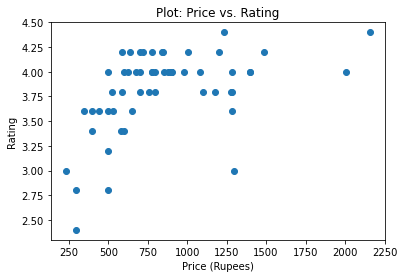

In [30]:
# It looks like rating might correlate roughly with price, while number sold doesn't.  Let's see.
plt.scatter(df_unique['Current_Price_Rupees'], df_unique['Rating']);
plt.xlabel('Price (Rupees)');
plt.ylabel('Rating');
plt.title('Plot: Price vs. Rating');

In [32]:
# The Details_Length column was a flight of fancy.  Let's delete it.
df_unique = df_unique.drop('Details_Length', axis=1)

## Step 3: Answering the Original Question

We've gotten a bit sidetracked.  The question we set out to answer is: **What brands of shoe at what prices sell the most and get the best ratings?**  But that's still vague, so let's narrow it down.

In [33]:
# First, let's amend the dataset with the prices in US dollars.  1 Indian rupee is 0.0125 USD, so...
df_unique['Current_Price_USD'] = df_unique['Current_Price_Rupees'] * 0.0125
# Source for that conversion: https://www.currency.me.uk/convert/inr/usd
df_unique.head()

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Current_Price_USD
0,ASIAN,2242,1098,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8,13.7250
1,ASIAN,240,674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0,8.4250
2,ASIAN,16662,588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8,7.3500
3,ASIAN,135,599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0,7.4875
4,Reebok,240,982,Men's Velocity Runner Lp Running Shoe,4.0,12.2750


In [34]:
# Now let's see what the data spread looks like.
df_unique.describe()

,How_Many_Sold,Current_Price_Rupees,Rating,Current_Price_USD
count,57.000000,57.000000,57.000000,57.000000
mean,3666.982456,845.210526,3.817544,10.565132
std,11080.179269,393.721472,0.411063,4.921518
min,2.000000,231.000000,2.400000,2.887500
25%,173.000000,588.000000,3.600000,7.350000
50%,421.000000,779.000000,4.000000,9.737500
75%,1795.000000,1080.000000,4.000000,13.500000
max,72611.000000,2159.000000,4.400000,26.987500


In [35]:
# I'll check the subset where both the number sold and the price are in the top quartile.
nosold_75 = df_unique.describe()['How_Many_Sold']['75%']
rating_75 = df_unique.describe()['Rating']['75%']
df_best = df_unique[(df_unique['How_Many_Sold'] >= nosold_75) & (df_unique['Rating'] >= rating_75)]
df_best.describe()

,How_Many_Sold,Current_Price_Rupees,Rating,Current_Price_USD
count,10.000000,10.000000,10.000000,10.000000
mean,15638.100000,953.400000,4.100000,11.917500
std,23087.408971,327.460328,0.141421,4.093254
min,1795.000000,498.000000,4.000000,6.225000
25%,3469.000000,724.000000,4.000000,9.050000
50%,4787.500000,890.500000,4.000000,11.131250
75%,15482.750000,1174.500000,4.200000,14.681250
max,72611.000000,1485.000000,4.400000,18.562500


In [36]:
# Only ten entries?  Let's see them.
df_best

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Current_Price_USD
6,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0,6.2250
8,Sparx,1795,880,Men's Sm-677 Running Shoe,4.0,11.0000
10,Reebok,2144,1005,Men's Stride Runner Shoes,4.2,12.5625
21,Campus,4583,1399,Mens First Running Shoe,4.0,17.4875
28,Sparx,38839,637,Men's Sd0323g Sneakers,4.2,7.9625
31,Adidas,4992,1485,Men's Yking 2.0 Running Shoes,4.2,18.5625
36,Sparx,3532,1231,Men's Running Shoes,4.4,15.3875
43,BATA,3448,799,Men's Formal Dress Slip On Shoes,4.0,9.9875
44,Campus,5690,901,Mens Stonic Running Shoes,4.0,11.2625
46,Bourge,18747,699,Men's Loire-z1 Running Shoes,4.0,8.7375


In [37]:
# Okay, now let's put them in a more helpful order.
df_best_sorted = df_best.sort_values(['Rating', 'How_Many_Sold'], ascending=False)
df_best_sorted

,Brand_Name,How_Many_Sold,Current_Price_Rupees,Product_Details,Rating,Current_Price_USD
36,Sparx,3532,1231,Men's Running Shoes,4.4,15.3875
28,Sparx,38839,637,Men's Sd0323g Sneakers,4.2,7.9625
31,Adidas,4992,1485,Men's Yking 2.0 Running Shoes,4.2,18.5625
10,Reebok,2144,1005,Men's Stride Runner Shoes,4.2,12.5625
6,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0,6.2250
46,Bourge,18747,699,Men's Loire-z1 Running Shoes,4.0,8.7375
44,Campus,5690,901,Mens Stonic Running Shoes,4.0,11.2625
21,Campus,4583,1399,Mens First Running Shoe,4.0,17.4875
43,BATA,3448,799,Men's Formal Dress Slip On Shoes,4.0,9.9875
8,Sparx,1795,880,Men's Sm-677 Running Shoe,4.0,11.0000


In [38]:
# Helper function
def add_commas(number):
    '''
    INPUT:
    number - (string) a string representation of an integer
    
    OUTPUT:
    number - (string) the same integer, but with commas inserted to denote thousands, millions, etc.
    '''
    if len(number) <= 3:
        return number;
    return add_commas(number[:-3]) + ',' + number[-3:];

# Sanity check
assert(add_commas('1234567890') == '1,234,567,890')
assert(add_commas('42069') == '42,069')
assert(add_commas('1') == '1')
print('Sane!')

Sane!


In [39]:
# Last but not least, let's print out the most relevant data in a neat format...
for n in range(df_best.shape[0]):
    d = df_best_sorted.iloc[n]
    print(str(n+1) + ": " + d['Product_Details'].strip() + ' by ' + d['Brand_Name'] + ', priced at ' \
    + add_commas(str(d['Current_Price_Rupees'])) + ' rupees ($' + "{:.2f}".format(d['Current_Price_USD']) \
     + ' USD) - rated ' + str(d['Rating']) + '/5.0, ' + add_commas(str(d['How_Many_Sold'])) + ' pairs sold')

1: Men's Running Shoes by Sparx, priced at 1,231 rupees ($15.39 USD) - rated 4.4/5.0, 3,532 pairs sold
2: Men's Sd0323g Sneakers by Sparx, priced at 637 rupees ($7.96 USD) - rated 4.2/5.0, 38,839 pairs sold
3: Men's Yking 2.0 Running Shoes by Adidas, priced at 1,485 rupees ($18.56 USD) - rated 4.2/5.0, 4,992 pairs sold
4: Men's Stride Runner Shoes by Reebok, priced at 1,005 rupees ($12.56 USD) - rated 4.2/5.0, 2,144 pairs sold
5: Men's Wonder-13 Sports Running Shoes by ASIAN, priced at 498 rupees ($6.23 USD) - rated 4.0/5.0, 72,611 pairs sold
6: Men's Loire-z1 Running Shoes by Bourge, priced at 699 rupees ($8.74 USD) - rated 4.0/5.0, 18,747 pairs sold
7: Mens Stonic Running Shoes by Campus, priced at 901 rupees ($11.26 USD) - rated 4.0/5.0, 5,690 pairs sold
8: Mens First Running Shoe by Campus, priced at 1,399 rupees ($17.49 USD) - rated 4.0/5.0, 4,583 pairs sold
9: Men's Formal Dress Slip On Shoes by BATA, priced at 799 rupees ($9.99 USD) - rated 4.0/5.0, 3,448 pairs sold
10: Men's Sm

There you have it!  We have a list of the best-rated, best-selling shoes on Amazon, sorted with the best at the top.

In [40]:
# For completion's sake, I'll write the final data-- and the full cleaned dataset-- to CSV files.
df_best_sorted.to_csv('MEN_SHOES_BEST.csv', index=False)
df_unique.to_csv('MEN_SHOES_CLEAN.csv', index=False)